<div>
<img src="https://www.sketchappsources.com/resources/source-image/payment-methods-logos.png" width="250" align="left"/>
</div>

## Business Credit Card Marketing - Assignment 4

#### Necessary imports

In [1]:
import os
from os.path import basename
import sys
import platform

import pandas as pd
from pandas import Grouper, DataFrame, concat
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import re
import itertools
import math
from math import sqrt

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, set_link_color_palette, linkage
from scipy import stats

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_row', 40) # set max row display
pd.set_option('display.max_columns', 20) # set max column width

# enable ability to see the value of multiple statements at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

/Users/colella2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### Data Prep & Exploration

(5949, 38)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5949 entries, 0 to 5948
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   respid        5949 non-null   int64
 1   hq_cell       5949 non-null   int64
 2   brandid       5949 non-null   int64
 3   origbrand     5949 non-null   int64
 4   pri_sec       5949 non-null   int64
 5   q6            5949 non-null   int64
 6   consider      5949 non-null   int64
 7   att_rating1   5949 non-null   int64
 8   att_rating2   5949 non-null   int64
 9   att_rating3   5949 non-null   int64
 10  att_rating4   5949 non-null   int64
 11  att_rating5   5949 non-null   int64
 12  att_rating6   5949 non-null   int64
 13  att_rating7   5949 non-null   int64
 14  att_rating8   5949 non-null   int64
 15  att_rating9   5949 non-null   int64
 16  att_rating10  5949 non-null   int64
 17  att_rating11  5949 non-null   int64
 18  att_rating12  5949 non-null   int64
 19  att_rating13  

,respid,hq_cell,brandid,origbrand,pri_sec,q6,consider,att_rating1,att_rating2,att_rating3,...,att_rating22,att_rating23,att_rating24,att_rating25,att_rating26,att_rating27,att_rating28,att_rating29,att_rating30,att_rating31
0,1,3,1,1,-99,6,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
1,1,3,2,2,0,6,9,4,4,4,...,4,4,4,4,4,4,4,4,4,4


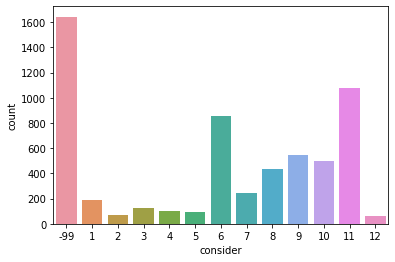

In [2]:
# read in original data
data = pd.read_excel (r'Brand_stratategy_data.v3.xls', 'data')

# create copy of the data
data_copy = data.copy()

print(data_copy.shape)

print(' ')
data_copy.info() # view data types and non-nulls

print(' ')
data_copy.head(2) # preview data

# the target ('consider'), which represents consumer preference, has a lot of missing values
w = sns.countplot(x=data_copy['consider'], data=data_copy)
plt.show()

In [3]:
# get counts from countplot
data_copy['consider'].value_counts()

# there are more NaNs than anything but also more 11's (definitely consider) and 6's than anything else

-99    1644
 11    1082
 6     854 
 9     547 
 10    495 
 8     439 
 7     247 
 1     185 
 3     125 
 4     103 
 5     95  
 2     70  
 12    63  
Name: consider, dtype: int64

In [4]:
# drop unnecessary columns
data_copy = data_copy.drop(['respid', 'hq_cell', 'origbrand', 'pri_sec', 'q6'], axis=1)
data_copy.columns

Index(['brandid', 'consider', 'att_rating1', 'att_rating2', 'att_rating3',
       'att_rating4', 'att_rating5', 'att_rating6', 'att_rating7',
       'att_rating8', 'att_rating9', 'att_rating10', 'att_rating11',
       'att_rating12', 'att_rating13', 'att_rating14', 'att_rating15',
       'att_rating16', 'att_rating17', 'att_rating18', 'att_rating19',
       'att_rating20', 'att_rating21', 'att_rating22', 'att_rating23',
       'att_rating24', 'att_rating25', 'att_rating26', 'att_rating27',
       'att_rating28', 'att_rating29', 'att_rating30', 'att_rating31'],
      dtype='object')

In [5]:
# rename columns as per the attributes they actually represent
data_copy = data_copy.rename(columns={"att_rating1": "access", 
                                      "att_rating2": "channels", 
                                      "att_rating3": "biz_products",
                                      "att_rating4": "biz_cash_flow",
                                      "att_rating5": "cool",
                                      "att_rating6": "emerging_leader",
                                      "att_rating7": "innovative",
                                      "att_rating8": "personalized",
                                      "att_rating9": "trustworthy",
                                      "att_rating10": "biz_responsive",
                                      "att_rating11": "biz_advisor",
                                      "att_rating12": "biz_understanding",
                                      "att_rating13": "biz_problem_solve",
                                      "att_rating14": "best_interests", 
                                      "att_rating15": "prestigous", 
                                      "att_rating16": "valued_cust",
                                      "att_rating17": "biz_person_recognition",
                                      "att_rating18": "cust_rewards",
                                      "att_rating19": "biz_rewards",
                                      "att_rating20": "easy_app",
                                      "att_rating21": "cust_service_excel",
                                      "att_rating22": "biz_financing",
                                      "att_rating23": "clear_comms",
                                      "att_rating24": "account_security",
                                      "att_rating25": "life_easier",
                                      "att_rating26": "biz_invest",
                                      "att_rating27": "app_approval_quick",
                                      "att_rating28": "fair_fees",
                                      "att_rating29": "best_rates",
                                      "att_rating30": "fair_treatment",
                                      "att_rating31": "good_value",
                                      "consider": "preference"
                                     })

#### Filter data

In [6]:
data_copy.head(3)

,brandid,preference,access,channels,biz_products,biz_cash_flow,cool,emerging_leader,innovative,personalized,...,biz_financing,clear_comms,account_security,life_easier,biz_invest,app_approval_quick,fair_fees,best_rates,fair_treatment,good_value
0,1,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
1,2,9,4,4,4,4,2,3,3,4,...,4,4,4,4,4,4,4,4,4,4
2,3,11,3,3,2,3,3,3,3,3,...,3,2,3,3,3,3,3,3,3,3


In [7]:
data_copy = data_copy.abs() # turn -99 to 99
data_copy = data_copy.replace(99, np.NaN) # replace 99 with NaN

# list(data_copy.isnull().sum()) # 43% of predictor columns are null

# only keep rows where preference/consider is not null
data_copy = data_copy[data_copy['preference'].notnull()]
list(data_copy.isnull().sum()) # taking this decision reduces nulls in predictor columns by nearly 2/3, which is great
# first two columns of brandid and preference should have NO nulls

data_copy.shape # it does, however, reduce dataset by 27%
# clearly nulls in other columns were associated with nulls in consider column

# at this point, ~1/4 of the rows of the dataset still have null values

[0,
 0,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978,
 978]

(4305, 33)

#### Examine distribution of response variable (preference)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

brandid
1    168
2    597
3    553
4    560
5    592
6    441
7    466
8    300
9    628
dtype: int64

478.3333333333333

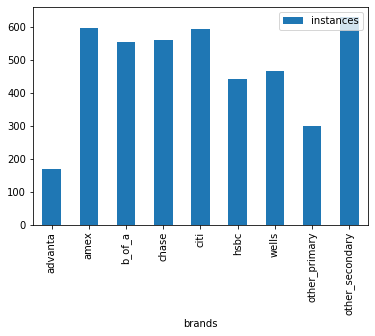

In [8]:
# after filtering the above dataframe, the majority of the responses come from Other Secondary, Amex, Citibank, Chase,
# then Bank of America

np.unique(data_copy['preference'])

data_copy.groupby(['brandid']).size()

bars = data_copy.groupby(['brandid']).size().values
bars_df = pd.DataFrame(bars, columns = ['instances'])

brands = ['advanta', 'amex', 'b_of_a', 'chase', 'citi', 'hsbc','wells', 'other_primary', 'other_secondary']
brands_df = pd.DataFrame(brands, columns = ['brands'])

preference_df = pd.concat([brands_df, bars_df], axis=1, sort=False)

# 1 is Advanta
# 2 is Amex
# 3 is Bank of America
# 4 is Chase
# 5 is Citibank
# 6 HSBC
# 7 Wells Fargo
# 8 is Other Primary
# 9 is Other Secondary

ax = preference_df.plot.bar(x='brands', y='instances')

np.mean(bars)

(3837, 33)

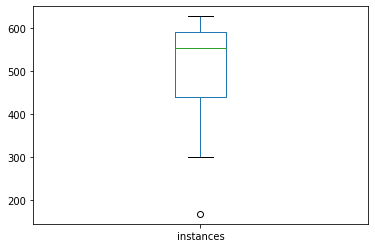

In [9]:
# clearly, 'advanta' and 'other_primary' are significantly underrepresented
boxplot = preference_df.boxplot(grid=False)

# due to imbalance in dataset, remove these columns for now
data_copy = data_copy[data_copy.brandid != 1] # removes advanta
data_copy = data_copy[data_copy.brandid != 8] # removes other_primary

data_copy.shape

In [10]:
data_copy = data_copy.reset_index()

data_copy['preference'].isnull().sum() # ensure no nulls in target column

y = data_copy['preference'] # specify dependent variable
len(y)

X = data_copy.iloc[:, 8:] # specify independent variables
len(X)

# X and y are same length

# examine feature columns
X.columns

data_copy.head(4)

0

3837

3837

Index(['emerging_leader', 'innovative', 'personalized', 'trustworthy',
       'biz_responsive', 'biz_advisor', 'biz_understanding',
       'biz_problem_solve', 'best_interests', 'prestigous', 'valued_cust',
       'biz_person_recognition', 'cust_rewards', 'biz_rewards', 'easy_app',
       'cust_service_excel', 'biz_financing', 'clear_comms',
       'account_security', 'life_easier', 'biz_invest', 'app_approval_quick',
       'fair_fees', 'best_rates', 'fair_treatment', 'good_value'],
      dtype='object')

,index,brandid,preference,access,channels,biz_products,biz_cash_flow,cool,emerging_leader,innovative,...,biz_financing,clear_comms,account_security,life_easier,biz_invest,app_approval_quick,fair_fees,best_rates,fair_treatment,good_value
0,1,2,9.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,2,3,11.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,3,4,11.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,...,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0
3,4,5,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data imputation: 2 options 
(KNN & column means by brand grouping)

#### Option 1: Column means by brand group

In [11]:
for col in data_copy.columns[3:]:
    data_copy[col] = data_copy[col].fillna(data_copy.groupby('brandid')[col].transform('mean'))

data_copy.head(2)

data_copy = data_copy.drop(['index'], axis=1)

data_copy.head(3)

data_copy.columns

,index,brandid,preference,access,channels,biz_products,biz_cash_flow,cool,emerging_leader,innovative,...,biz_financing,clear_comms,account_security,life_easier,biz_invest,app_approval_quick,fair_fees,best_rates,fair_treatment,good_value
0,1,2,9.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,2,3,11.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


,brandid,preference,access,channels,biz_products,biz_cash_flow,cool,emerging_leader,innovative,personalized,...,biz_financing,clear_comms,account_security,life_easier,biz_invest,app_approval_quick,fair_fees,best_rates,fair_treatment,good_value
0,2,9.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,3,11.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,4,11.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,...,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0


Index(['brandid', 'preference', 'access', 'channels', 'biz_products',
       'biz_cash_flow', 'cool', 'emerging_leader', 'innovative',
       'personalized', 'trustworthy', 'biz_responsive', 'biz_advisor',
       'biz_understanding', 'biz_problem_solve', 'best_interests',
       'prestigous', 'valued_cust', 'biz_person_recognition', 'cust_rewards',
       'biz_rewards', 'easy_app', 'cust_service_excel', 'biz_financing',
       'clear_comms', 'account_security', 'life_easier', 'biz_invest',
       'app_approval_quick', 'fair_fees', 'best_rates', 'fair_treatment',
       'good_value'],
      dtype='object')

In [12]:
preference_mean = data_copy.groupby('brandid')['preference'].mean().values
pref_mean_df = pd.DataFrame(preference_mean, columns = ['preference_mean'])

brands2 = ['amex', 'b_of_a', 'chase', 'citi', 'hsbc','wells', 'other_secondary']
brands2_df = pd.DataFrame(brands2, columns = ['brands'])

result = pd.concat([brands2_df, pref_mean_df], axis=1, sort=False)
result 

# preference is highest for other_secondary and amex

,brands,preference_mean
0,amex,8.038526
1,b_of_a,7.770344
2,chase,7.433929
3,citi,7.736486
4,hsbc,7.276644
5,wells,7.493562
6,other_secondary,9.313694


#### Option 2: KNN Imputer (***deprecated***)

 - fill missing values using K-Nearest Neighbors
 - each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set 
 - samples are close if the features that neither is missing are close

In [13]:
# at this point, there are 828 rows with null values still

# since KNN imputer resulted in imbalanced dataset in terms of distribution of predictors, impute with means of each 
# column for each brand separately

    
 # ***deprecated***   
# impute predictors (ONLY) intelligently with KNN Imputer
# impute_knn = KNNImputer(n_neighbors=3, metric='nan_euclidean', weights='uniform')

# X_imputed = impute_knn.fit_transform(X)
# print(X_imputed)

# build predictors only df
#predictors_df = pd.DataFrame({'access': X_imputed[:, 0], 'channels': X_imputed[:, 1], 'biz_products': X_imputed[:, 2],
#                     'biz_cash_flow': X_imputed[:, 3], 'cool': X_imputed[:, 4], 'emerging_leader': X_imputed[:, 5],
#                     'innovative': X_imputed[:, 6], 'personalized': X_imputed[:, 7], 'trustworthy': X_imputed[:, 8],
#                     'biz_responsive': X_imputed[:, 9], 'biz_advisor': X_imputed[:, 10], 
#                      'biz_understanding': X_imputed[:, 11], 'biz_problem_solve': X_imputed[:, 12], 
#                     'best_interests': X_imputed[:, 13], 'prestiguous': X_imputed[:, 14],
#                     'valued_cust': X_imputed[:, 15], 'biz_person_recognition': X_imputed[:, 16],
#                     'cust_rewards': X_imputed[:, 17], 'biz_rewards': X_imputed[:, 18],
#                     'easy_app': X_imputed[:, 19], 'cust_service_excel': X_imputed[:, 20],
#                     'biz_financing': X_imputed[:, 21], 'clear_comms': X_imputed[:, 22],
#                     'account_security': X_imputed[:, 23], 'life_easier': X_imputed[:, 24],
#                     'biz_invest': X_imputed[:, 25], 'app_approval_quick': X_imputed[:, 26],
#                     'fair_fees': X_imputed[:, 27], 'best_rates': X_imputed[:, 28],
#                     'fair_treatment': X_imputed[:, 29], 'good_value': X_imputed[:, 30]})

# predictors_df.head(15)
# list(predictors_df.isnull().sum()) # should be no nulls

### Modeling

In [14]:
# this references the data_copy careted via above mean by brand group
predictors_df = data_copy.drop(['brandid', 'preference'], axis=1)
predictors_df.head()

,access,channels,biz_products,biz_cash_flow,cool,emerging_leader,innovative,personalized,trustworthy,biz_responsive,...,biz_financing,clear_comms,account_security,life_easier,biz_invest,app_approval_quick,fair_fees,best_rates,fair_treatment,good_value
0,4.000000,4.000000,4.000000,4.000000,2.000000,3.000000,3.0000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
1,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.0000,3.000000,3.000000,3.000000,...,3.000000,2.000000,3.000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
2,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.0000,3.000000,3.000000,3.000000,...,3.000000,2.000000,3.000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000
3,2.870192,2.838942,2.725962,2.528846,2.504808,2.622596,2.5625,2.516827,2.742788,2.615385,...,2.766827,2.701923,2.875,2.564904,2.704327,2.848558,2.581731,2.644231,2.677885,2.658654
4,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.0000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000


In [15]:
# check the range of imputed values; imputation was done with mean via KNN so calling the cohort "means"
means = []

for col in predictors_df.columns:
    a = predictors_df[col].mean()
    means.append(a)

np.max(means) # max of range
np.min(means) # min of range

# min and max betw. 2.20 and 2.88

means

2.875984855421441

2.2060106402216073

[2.8321866161234945,
 2.8296041336591182,
 2.6780384211456227,
 2.5320574017323536,
 2.429636767343737,
 2.587820313507272,
 2.5605718854217234,
 2.542584900975866,
 2.691974888453913,
 2.6209277102151916,
 2.2060106402216073,
 2.5441846683427696,
 2.519792148981522,
 2.4816540864960315,
 2.623909077656122,
 2.549324685676694,
 2.5271179238959984,
 2.487449577662217,
 2.5467006043131173,
 2.760216088785205,
 2.6190592065423672,
 2.671266906736078,
 2.6715871937386435,
 2.875984855421441,
 2.563466349468324,
 2.6487059267749213,
 2.766213936066404,
 2.501524607642595,
 2.578191236490223,
 2.666498383673523,
 2.567119007907541]

In [16]:
# round to ceiling or floor for imputed values (based on below logic) since they need to be a whole number

q = []

for col in predictors_df.columns:
    
    z = predictors_df[col].mean()
    q.append(z)
    
    if z <= 2.5:
        predictors_df[col] = predictors_df[col].apply(np.floor)
    elif z > 2.5:
        predictors_df[col] = predictors_df[col].apply(np.ceil)
        
predictors_df.head(10) # confrim change as expected

,access,channels,biz_products,biz_cash_flow,cool,emerging_leader,innovative,personalized,trustworthy,biz_responsive,...,biz_financing,clear_comms,account_security,life_easier,biz_invest,app_approval_quick,fair_fees,best_rates,fair_treatment,good_value
0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,...,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0
3,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0
5,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
6,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
7,3.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,4.0,...,3.0,3.0,2.0,2.0,2.0,3.0,4.0,2.0,3.0,3.0
8,2.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,4.0,...,3.0,2.0,2.0,3.0,3.0,2.0,4.0,2.0,3.0,2.0
9,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,...,2.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0


In [17]:
# check summary for each predictor column
predictors_df.describe().transpose()

predictors_df.median(axis = 0) # check median of each predictor

predictors_df.mode() # a rating of 3 overwhelms the predictors

,count,mean,std,min,25%,50%,75%,max
access,3837.0,2.884806,0.729443,1.0,3.0,3.0,3.0,4.0
channels,3837.0,2.885327,0.708128,1.0,3.0,3.0,3.0,4.0
biz_products,3837.0,2.762575,0.830013,1.0,2.0,3.0,3.0,4.0
biz_cash_flow,3837.0,2.661454,0.961895,1.0,2.0,3.0,3.0,4.0
cool,3837.0,2.342455,1.025231,1.0,2.0,2.0,3.0,4.0
emerging_leader,3837.0,2.695335,0.832544,1.0,2.0,3.0,3.0,4.0
innovative,3837.0,2.677352,0.849855,1.0,2.0,3.0,3.0,4.0
personalized,3837.0,2.655981,0.870962,1.0,2.0,3.0,3.0,4.0
trustworthy,3837.0,2.764660,0.720707,1.0,2.0,3.0,3.0,4.0
biz_responsive,3837.0,2.722961,0.884124,1.0,2.0,3.0,3.0,4.0


access                    3.0
channels                  3.0
biz_products              3.0
biz_cash_flow             3.0
cool                      2.0
emerging_leader           3.0
innovative                3.0
personalized              3.0
trustworthy               3.0
biz_responsive            3.0
biz_advisor               2.0
biz_understanding         3.0
biz_problem_solve         3.0
best_interests            2.0
prestigous                3.0
valued_cust               3.0
biz_person_recognition    3.0
cust_rewards              2.0
biz_rewards               3.0
easy_app                  3.0
cust_service_excel        3.0
biz_financing             3.0
clear_comms               3.0
account_security          3.0
life_easier               3.0
biz_invest                3.0
app_approval_quick        3.0
fair_fees                 3.0
best_rates                3.0
fair_treatment            3.0
good_value                3.0
dtype: float64

,access,channels,biz_products,biz_cash_flow,cool,emerging_leader,innovative,personalized,trustworthy,biz_responsive,...,biz_financing,clear_comms,account_security,life_easier,biz_invest,app_approval_quick,fair_fees,best_rates,fair_treatment,good_value
0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


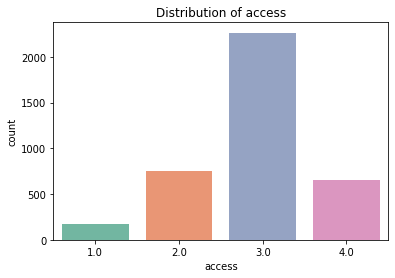

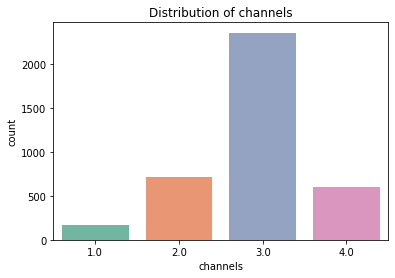

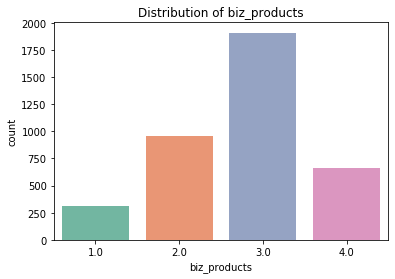

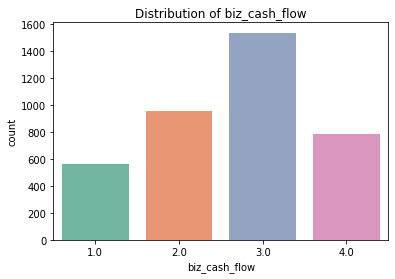

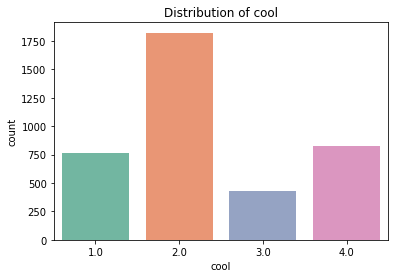

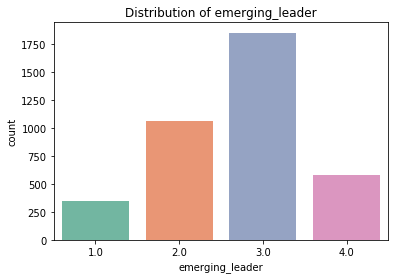

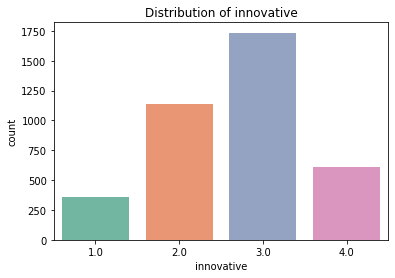

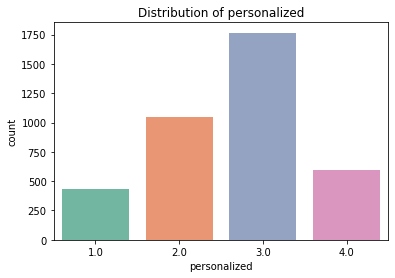

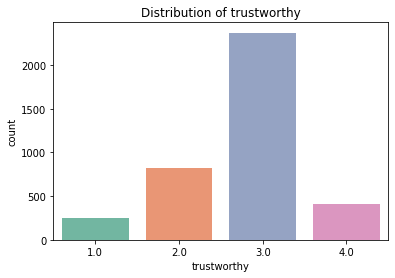

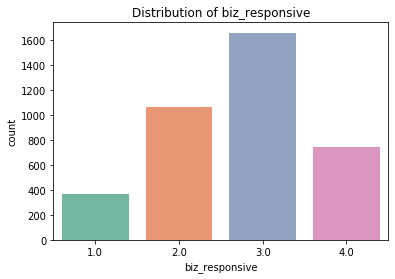

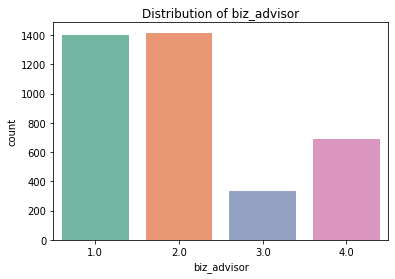

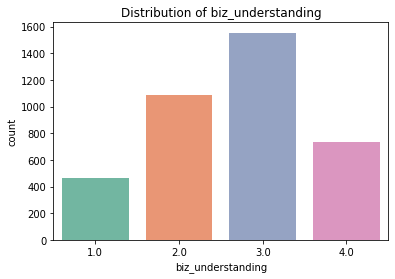

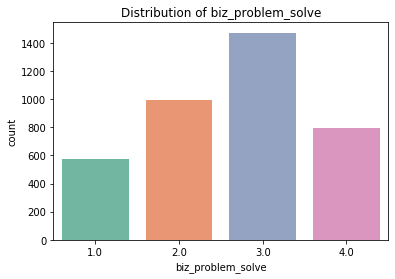

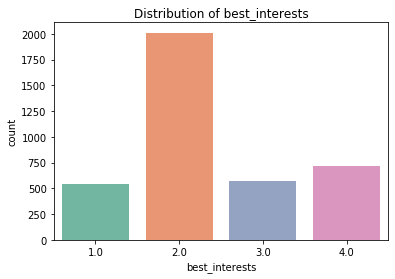

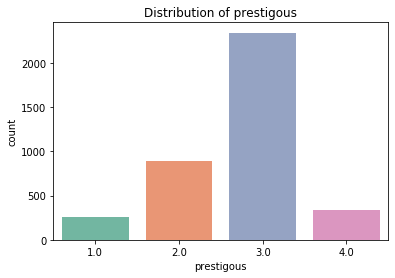

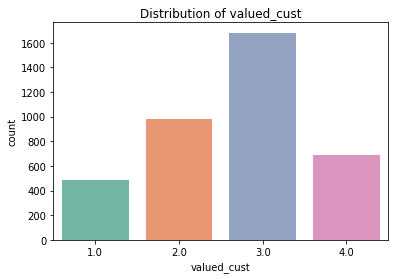

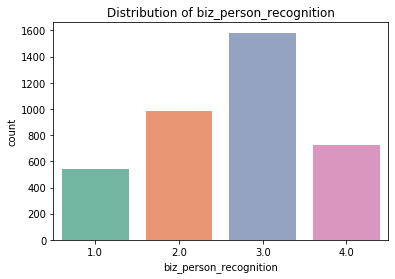

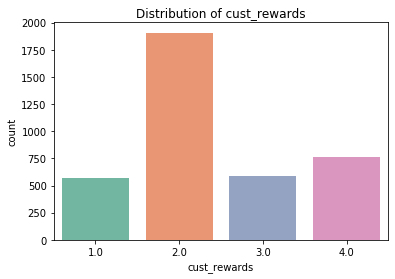

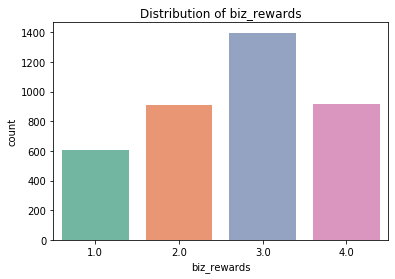

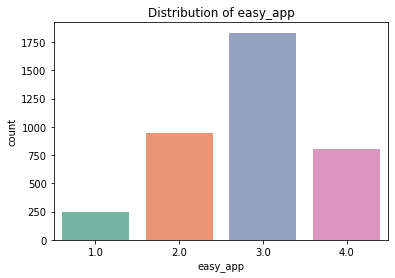

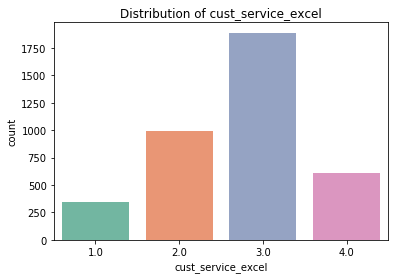

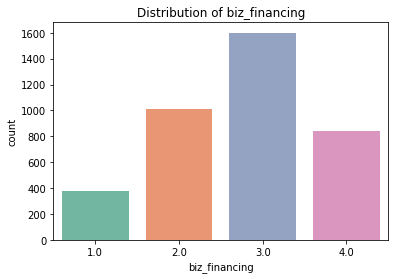

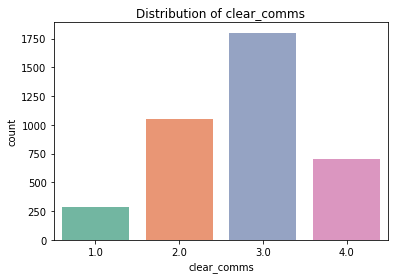

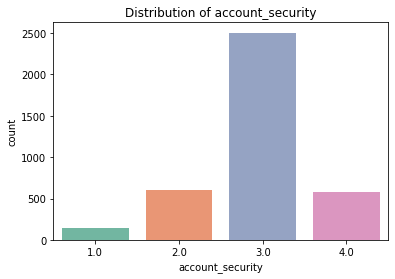

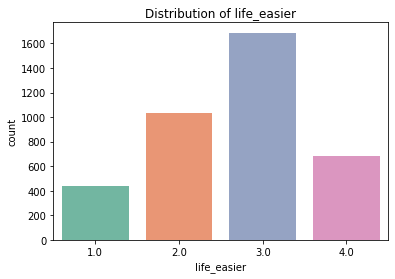

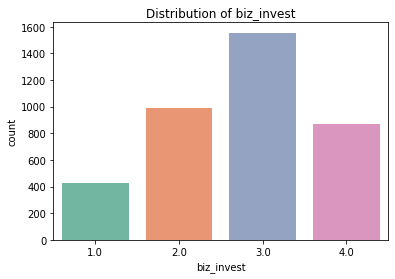

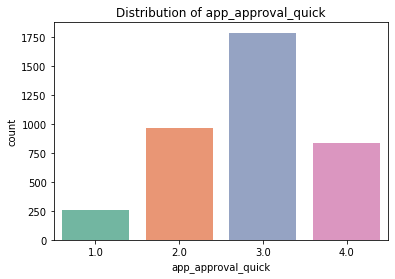

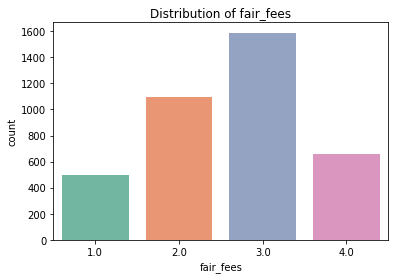

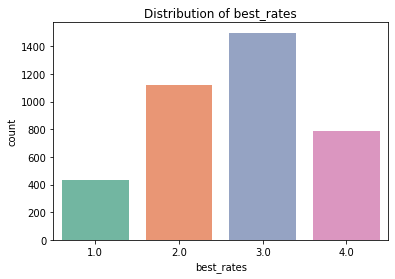

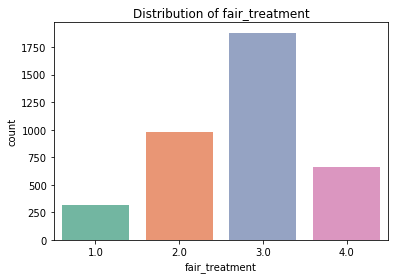

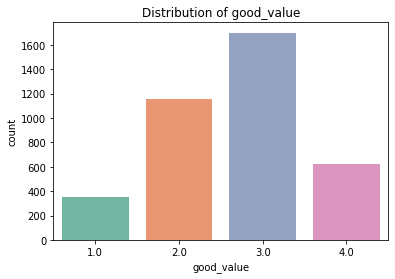

In [18]:
# generate count plots for every column of df -- a rating of 4 dominates each attribute, which is not ideal
for col in predictors_df.columns:
    z = sns.countplot(x=col, data=predictors_df, palette="Set2")
    r = plt.title('Distribution of {}'.format(col))
    plt.show()

In [19]:
# create df only with dependent and independent variables of interest
modeling_df = pd.concat([predictors_df, data_copy['preference']], axis=1, sort=False)
modeling_df.head(5)

,access,channels,biz_products,biz_cash_flow,cool,emerging_leader,innovative,personalized,trustworthy,biz_responsive,...,clear_comms,account_security,life_easier,biz_invest,app_approval_quick,fair_fees,best_rates,fair_treatment,good_value,preference
0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,9.0
1,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,11.0
2,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,...,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,11.0
3,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,11.0
4,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,11.0


In [20]:
# examine means among predictors based on preference/consider rating
modeling_df.groupby('preference').mean()

,access,channels,biz_products,biz_cash_flow,cool,emerging_leader,innovative,personalized,trustworthy,biz_responsive,...,biz_financing,clear_comms,account_security,life_easier,biz_invest,app_approval_quick,fair_fees,best_rates,fair_treatment,good_value
preference,,,,,,,,,,,,,,,,,,,,,
1.0,2.923077,2.917160,2.686391,2.710059,2.360947,2.609467,2.680473,2.449704,2.532544,2.656805,...,2.710059,2.739645,3.000000,2.603550,2.781065,2.964497,2.644970,2.680473,2.556213,2.615385
2.0,2.809524,2.968254,2.650794,2.793651,2.428571,2.682540,2.682540,2.539683,2.555556,2.666667,...,2.920635,2.682540,2.936508,2.428571,2.857143,2.714286,2.476190,2.698413,2.571429,2.460317
3.0,2.896552,2.931034,2.887931,2.732759,2.456897,2.732759,2.706897,2.750000,2.646552,2.732759,...,2.741379,2.810345,2.974138,2.758621,2.810345,2.948276,2.508621,2.672414,2.655172,2.672414
4.0,2.979592,2.928571,2.530612,2.673469,2.234694,2.591837,2.489796,2.346939,2.571429,2.704082,...,2.642857,2.663265,2.959184,2.540816,2.755102,2.867347,2.448980,2.479592,2.673469,2.540816
5.0,2.988372,3.011628,2.813953,2.674419,2.395349,2.906977,2.662791,2.651163,2.744186,2.732558,...,2.883721,2.906977,2.988372,2.755814,2.895349,2.941860,2.581395,2.604651,2.686047,2.523256
6.0,2.988432,2.970437,2.854756,2.805913,2.411311,2.732648,2.780206,2.808483,2.811054,2.889460,...,2.938303,2.888175,2.955013,2.799486,2.892031,3.007712,2.767352,2.868895,2.880463,2.852185
7.0,2.762557,2.776256,2.579909,2.534247,2.191781,2.511416,2.561644,2.547945,2.602740,2.566210,...,2.602740,2.671233,2.799087,2.525114,2.662100,2.721461,2.534247,2.579909,2.630137,2.534247
8.0,2.845036,2.864407,2.772397,2.721550,2.268765,2.619855,2.641646,2.622276,2.716707,2.699758,...,2.719128,2.714286,2.888620,2.668281,2.699758,2.762712,2.615012,2.668281,2.738499,2.636804
9.0,2.782946,2.802326,2.674419,2.546512,2.313953,2.662791,2.620155,2.608527,2.761628,2.608527,...,2.680233,2.711240,2.864341,2.616279,2.660853,2.724806,2.558140,2.655039,2.653101,2.616279


In [21]:
y = modeling_df['preference'] # specify dependent variable anew

X = modeling_df.iloc[:, 0:31] # specify independent variables anew
len(X.columns) # should have 31 columns corresponding to all attributes

X.columns

31

Index(['access', 'channels', 'biz_products', 'biz_cash_flow', 'cool',
       'emerging_leader', 'innovative', 'personalized', 'trustworthy',
       'biz_responsive', 'biz_advisor', 'biz_understanding',
       'biz_problem_solve', 'best_interests', 'prestigous', 'valued_cust',
       'biz_person_recognition', 'cust_rewards', 'biz_rewards', 'easy_app',
       'cust_service_excel', 'biz_financing', 'clear_comms',
       'account_security', 'life_easier', 'biz_invest', 'app_approval_quick',
       'fair_fees', 'best_rates', 'fair_treatment', 'good_value'],
      dtype='object')

In [22]:
X.head(5)

,access,channels,biz_products,biz_cash_flow,cool,emerging_leader,innovative,personalized,trustworthy,biz_responsive,...,biz_financing,clear_comms,account_security,life_easier,biz_invest,app_approval_quick,fair_fees,best_rates,fair_treatment,good_value
0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,...,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0
3,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0


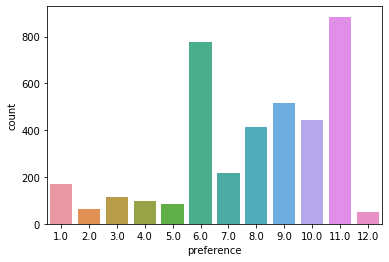

In [23]:
# can compare this distribution for preference to that which was pre-interpolation

m = sns.countplot(x=modeling_df['preference'], data=modeling_df)
plt.show()

In [24]:
# get counts from countplot
modeling_df['preference'].value_counts()

# still more 11's and 6's than anything else but not with such a high margin

11.0    885
6.0     778
9.0     516
10.0    444
8.0     413
7.0     219
1.0     169
3.0     116
4.0     98 
5.0     86 
2.0     63 
12.0    50 
Name: preference, dtype: int64

##### Examine correlations among variables

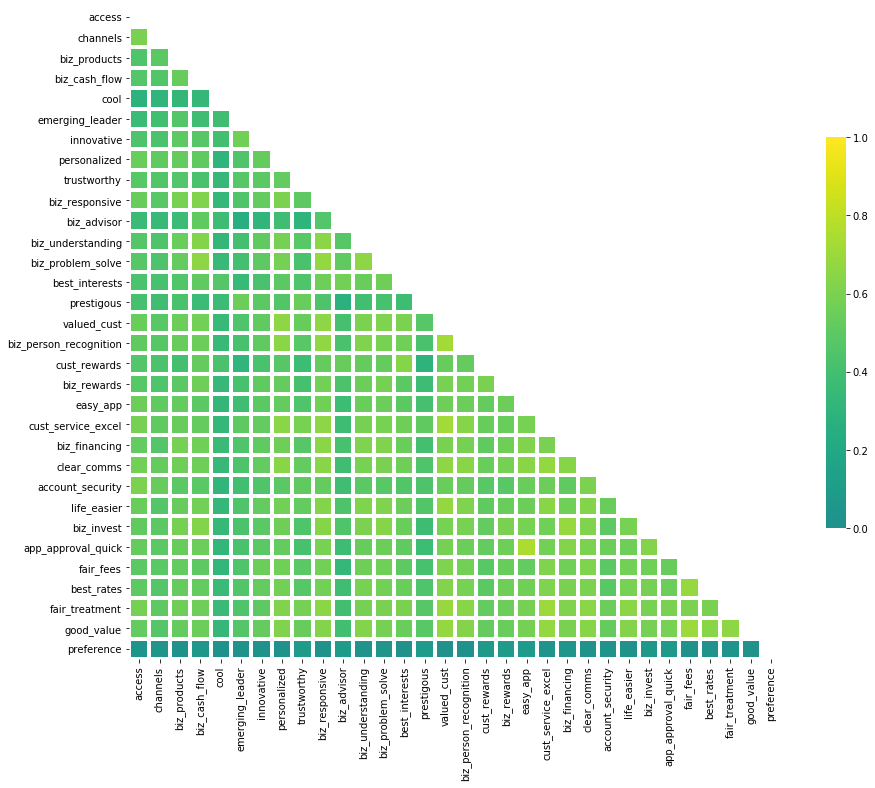

In [25]:
mask = np.triu(np.ones_like(modeling_df.corr().abs(), dtype=np.bool))

f, ax = plt.subplots(figsize=(16,12))

aa = sns.heatmap(modeling_df.corr().abs(), mask=mask, cmap = 'viridis', vmax = 1.0, vmin = 0.0, center = 0,
                square=True, linewidths=3, cbar_kws={"shrink": .6}, annot = False)

In [33]:
# get highly correlated variables only

cutoff = 0.7 # set any correlation cut-off you want

corr_df = modeling_df.corr().abs()

high_corr_df = np.where(corr_df > cutoff)

high_corr_df = [(corr_df.columns[x],corr_df.columns[y]) for x,y in zip(*high_corr_df) if x != y and x < y]

high_corr_df

[('valued_cust', 'biz_person_recognition'),
 ('valued_cust', 'cust_service_excel'),
 ('easy_app', 'app_approval_quick')]

##### Examine variable clusters

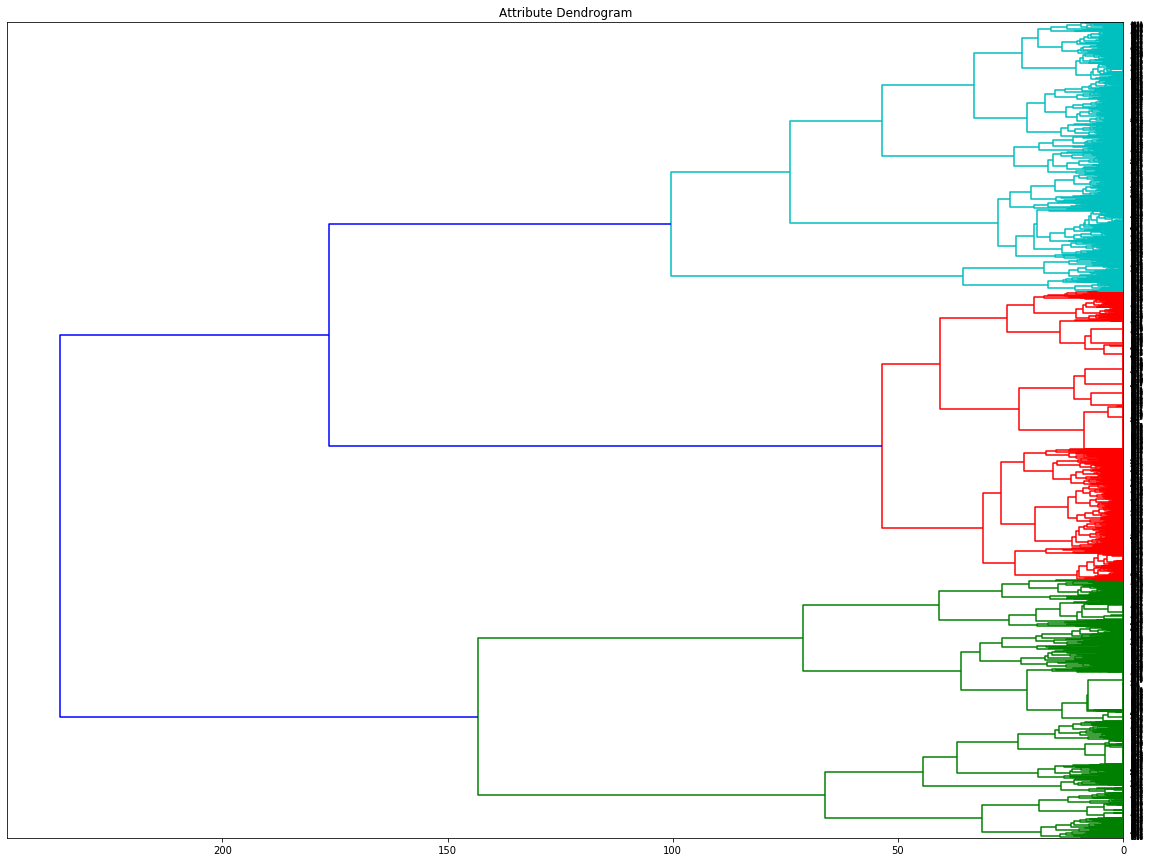

In [31]:
# there seem to be 4 main clusters of attributes in the data -- just used for context during data exploration
data = modeling_df.values

oo = plt.figure(figsize=(20, 15))
ll = plt.title("Attribute Dendrogram")

# we use 'ward' as the method since it minimizes then variants of distances between the clusters
dend = shc.dendrogram(shc.linkage(data, method='ward'), orientation='left') 

##### Train-test split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape
y_train.shape

X_test.shape
y_test.shape

(3069, 31)

(3069,)

(768, 31)

(768,)

### Dimension Reduction (PCA)

<br>
Steps:
<br>
1) Original (large) data table
<br>
2) Covariance matrix
<br>
3) "Eigenstuff" -- eigenvalues & vectors
<br>
4) Smaller table of reduced dimensions

Explained variation per principal component: [0.53743657 0.04286752 0.03569941 0.02975134 0.02700722 0.02348324
 0.01974033 0.01826279 0.01737904 0.0158362  0.01519845 0.01495769
 0.01457775 0.01416039 0.01353189 0.01295525 0.01239113 0.01203717
 0.01187688 0.01150111 0.01098979 0.01084025 0.01008376 0.00968924
 0.00961439 0.0090373  0.00875043 0.00853794 0.00797061 0.00707881
 0.00675611]
 


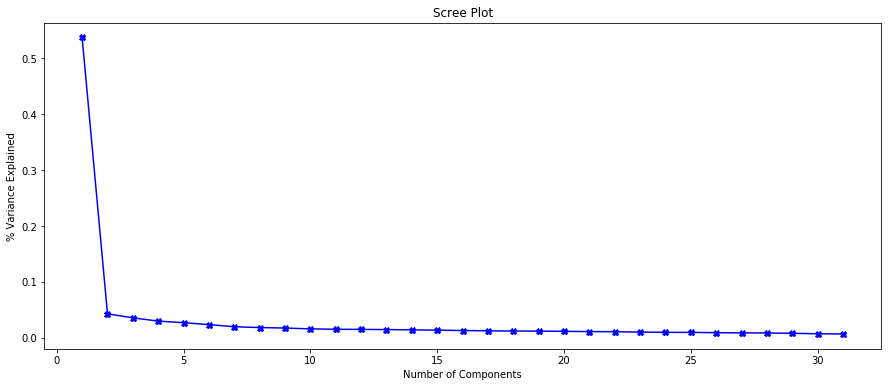

In [35]:
# PCA leads to orthogonality; orthogonal means all independent variables in the model are uncorrelated
# PCA splits covariance/correlation matrix into eigenvalues (scale) and eigenvectors (direction)

# PCA is affected by scale: need to scale features prior to applying PCA
# standardize the data to have a mean of 0 & variance of 1
x = X.values
x = StandardScaler().fit_transform(x) # standardize the features

# initial number of principal components to examine, matching # of cols in dataset
n_com = 31
pca_31 = PCA(n_components = n_com)
principal_components_31 = pca_31.fit_transform(x)

# how much information (variance) can be attributed to each principal components
explained_variance_ratio = pca_31.explained_variance_ratio_ 

# plot explained variance ratio w/ PCA Scree Plot (defined in next cell)
x_axis = range(1, n_com + 1)
aa = plt.figure(figsize=(15, 6))
bb = plt.plot(x_axis, explained_variance_ratio, marker = 'X', color='b')
cc = plt.xlabel('Number of Components')

dd = plt.ylabel('% Variance Explained')
kk = plt.title('Scree Plot')

print('Explained variation per principal component: {}'.format(pca_31.explained_variance_ratio_))
print(' ')

In [36]:
# examine the covariance matrix
# each element represents the covariance between 2 features
# eigendecomposition of covariance matrix yields same result as eigendecomp. on correlation matrix, if data was
# standardized, b/c corr. matrix is the normalized cov. matrix

print('Covariance matrix: \n%s' %np.cov(x.T))

Covariance matrix: 
[[1.00026069 0.59735417 0.44793598 0.46356273 0.28569274 0.36167835
  0.44182393 0.54257156 0.4830975  0.53918655 0.35711037 0.46752721
  0.47257324 0.43370648 0.40797033 0.5420078  0.50869182 0.46641563
  0.48046008 0.5470778  0.58168024 0.52186295 0.57701364 0.60615773
  0.54627958 0.51422686 0.52467309 0.49592559 0.50316776 0.57936159
  0.52244232]
 [0.59735417 1.00026069 0.49445943 0.46093109 0.30733542 0.39185323
  0.43720429 0.5097276  0.45700457 0.47901181 0.34561229 0.44142563
  0.43888409 0.41916174 0.39018308 0.47943414 0.47427978 0.43035774
  0.44792831 0.51050699 0.51329584 0.46792549 0.52395166 0.53843385
  0.46161286 0.49305519 0.48454812 0.49023044 0.46741494 0.50460373
  0.46771595]
 [0.44793598 0.49445943 1.00026069 0.53810814 0.32572527 0.46468535
  0.50350476 0.52612144 0.46275804 0.58723037 0.36007727 0.5457405
  0.52459012 0.45922532 0.42935126 0.55028063 0.53436322 0.40343843
  0.49297407 0.51898673 0.53322664 0.58068663 0.56239104 0.48532485
 

In [37]:
# eigenvalue is a #: how much variance there is in the data in that direction

print('Eigenvalues:')
print(' ')
for eigenvalue in pca_31.explained_variance_:
    print(eigenvalue)
    
# explained_variance_ratio from above is just the proportion: (below item) / (sum of all below items)

Eigenvalues:
 
16.664876883688788
1.3292395612122856
1.1069703211297708
0.9225320597264832
0.8374421021626111
0.728170187408327
0.6121098183714765
0.5662940545370643
0.5388907350230998
0.4910500369690421
0.4712748367517575
0.46380916749801027
0.4520280596521242
0.4390863974910721
0.4195979268628879
0.4017175963360082
0.38422519727584187
0.3732494452542928
0.3682792801019542
0.35662734792827255
0.3407724171626459
0.33613527944076976
0.3126778955637024
0.3004446744714144
0.29812366029346804
0.28022936543350757
0.27133407053540864
0.2647452372581127
0.24715336240777142
0.2195003984572498
0.20949395831849335


In [38]:
# eigenvector is a direction, specifically the direction coefficients/cosines/angle of orthogonal rotation or 
# transformation; they are unit-scaled loadings; they limit the behavior of the linear transformation
# eigenvector (unit vector) with the highest eigenvalue is the principal component

print('Eigenvectors:')
print(' ')
for eigenvector in pca_31.components_:
    print(eigenvector)

Eigenvectors:
 
[-0.17126278 -0.16070516 -0.17447546 -0.18042175 -0.11900117 -0.14744191
 -0.16862787 -0.18735821 -0.16350497 -0.1983112  -0.13914769 -0.18859062
 -0.18971858 -0.17615881 -0.14648815 -0.20057861 -0.19308417 -0.1695783
 -0.17947017 -0.18390656 -0.19908471 -0.19147799 -0.19895787 -0.17226977
 -0.19244847 -0.19063096 -0.18475289 -0.1851468  -0.18807895 -0.19847681
 -0.19626422]
[-9.16063426e-02 -1.11569900e-01 -7.03338818e-02  2.09683142e-01
  4.10432565e-02 -3.68646786e-01 -2.21390013e-01 -9.45423762e-02
 -3.08380018e-01  6.86380879e-02  4.09596130e-01  1.33564890e-01
  1.79300660e-01  2.48319996e-01 -4.03400147e-01 -1.90259040e-02
  3.54276281e-02  3.17564223e-01  1.35864920e-01  3.31603136e-02
 -1.28791675e-01  7.32702870e-02 -2.68054215e-02 -8.12792698e-02
 -2.58849194e-04  1.39191327e-01  6.92716700e-02 -9.62775983e-02
 -3.29700323e-02 -5.41578141e-02 -6.31071831e-02]
[-0.15957445 -0.05947948 -0.02117767  0.01499783  0.63754814  0.30667005
  0.18654985 -0.10535314  0.

In [39]:
print(' ')
# loadings are eigenvectors with the info. re: magnitude/variability of rotated data.
# loadings = eigenvectors * sqrt(eigenvalues); so, they also include variance b/c of eigenvalue component
# loadings are the pearson correlation between the original variables and the principal components
print('Loadings:')
pca_31.components_ * np.sqrt(pca_31.explained_variance_)

 
Loadings:


array([[-6.99139812e-01, -1.85281245e-01, -1.83570264e-01,
        -1.73292447e-01, -1.08900187e-01, -1.25816444e-01,
        -1.31930138e-01, -1.40991757e-01, -1.20027652e-01,
        -1.38966498e-01, -9.55241383e-02, -1.28436882e-01,
        -1.27553555e-01, -1.16729159e-01, -9.48897190e-02,
        -1.27129120e-01, -1.19684961e-01, -1.03602411e-01,
        -1.08913301e-01, -1.09825841e-01, -1.16217124e-01,
        -1.11013526e-01, -1.11252483e-01, -9.44259431e-02,
        -1.05078217e-01, -1.00913732e-01, -9.62372947e-02,
        -9.52643261e-02, -9.35025488e-02, -9.29881098e-02,
        -8.98311343e-02],
       [-3.73961247e-01, -1.28631896e-01, -7.40001459e-02,
         2.01397581e-01,  3.75594485e-02, -3.14576951e-01,
        -1.73209895e-01, -7.11455129e-02, -2.26379235e-01,
         4.80981143e-02,  2.81185532e-01,  9.09624132e-02,
         1.20549270e-01,  1.64545755e-01, -2.61308008e-01,
        -1.20588455e-02,  2.19601347e-02,  1.94013144e-01,
         8.24510100e-02,  1.98

In [40]:
# print the eigen pairs, given all 31 principal components

eigenvalues, eigenvectors = np.linalg.eig(np.cov(x.T)) # using np here
eigenpairs = [(np.abs(eigenvalues[a]), eigenvectors[:,a]) for a in range(len(eigenvalues))]
eigenpairs.sort(reverse=True)
eigenpairs[:3] # print first 3 only


# signs mismatch at times but that's expected since sklearn pca provides entries of an eigenvectors row-wise, whereas 
# np.linalg.eig() provides them column-wise; so, negative version of eigenvector is same eigenvector
# this verifies 100% match

abs(eigenvectors.T.round(10)).all() == abs(pca_31.components_.round(10)).all() # all values must be truthy

[(16.66487688368874,
  array([-0.17126278, -0.16070516, -0.17447546, -0.18042175, -0.11900117,
         -0.14744191, -0.16862787, -0.18735821, -0.16350497, -0.1983112 ,
         -0.13914769, -0.18859062, -0.18971858, -0.17615881, -0.14648815,
         -0.20057861, -0.19308417, -0.1695783 , -0.17947017, -0.18390656,
         -0.19908471, -0.19147799, -0.19895787, -0.17226977, -0.19244847,
         -0.19063096, -0.18475289, -0.1851468 , -0.18807895, -0.19847681,
         -0.19626422])),
 (1.3292395612122883,
  array([ 9.16063426e-02,  1.11569900e-01,  7.03338818e-02, -2.09683142e-01,
         -4.10432565e-02,  3.68646786e-01,  2.21390013e-01,  9.45423762e-02,
          3.08380018e-01, -6.86380879e-02, -4.09596130e-01, -1.33564890e-01,
         -1.79300660e-01, -2.48319996e-01,  4.03400147e-01,  1.90259040e-02,
         -3.54276281e-02, -3.17564223e-01, -1.35864920e-01, -3.31603136e-02,
          1.28791675e-01, -7.32702870e-02,  2.68054215e-02,  8.12792698e-02,
          2.58849194e-04, 

True

array([16.66487688, 17.99411644, 19.10108677, 20.02361883, 20.86106093,
       21.58923112, 22.20134093, 22.76763499, 23.30652572, 23.79757576,
       24.2688506 , 24.73265976, 25.18468782, 25.62377422, 26.04337215,
       26.44508974, 26.82931494, 27.20256439, 27.57084367, 27.92747102,
       28.26824343, 28.60437871, 28.91705661, 29.21750128, 29.51562494,
       29.79585431, 30.06718838, 30.33193362, 30.57908698, 30.79858738,
       31.00808133])

array([ 53.74365703,  58.03040908,  61.60035044,  64.57548472,
        67.27620681,  69.62453072,  71.59856392,  73.42484284,
        75.162747  ,  76.74636655,  78.26621175,  79.76198043,
        81.21975543,  82.63579402,  83.98898296,  85.28450845,
        86.52362154,  87.72733822,  88.91502628,  90.06513726,
        91.16411663,  92.24814139,  93.25651689,  94.22544067,
        95.18687926,  96.09060937,  96.96565245,  97.81944677,
        98.6165079 ,  99.32438916, 100.        ])

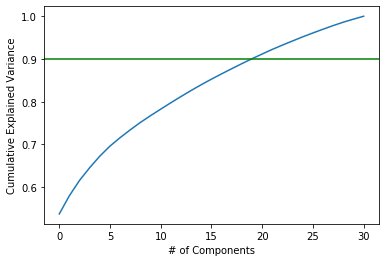

In [41]:
# visualization of how the first 12 components explain ~90% of the variance
# the first 12 components include ~ 90%of the information, starting with an index of 0

# explained variance is to define the squared-length of the vector when plotting

# cumulative amount of variance only
np.cumsum(pca_31.explained_variance_)

# cumulative amount of variance explained
(np.cumsum(pca_31.explained_variance_)/np.sum(pca_31.explained_variance_)*100)

ee = plt.plot(np.cumsum(pca_31.explained_variance_ratio_)) # cumulative % of variance explained -- most understandable
gg = plt.xlabel('# of Components')
pp = plt.ylabel('Cumulative Explained Variance')
ss = plt.axhline(y=0.9, color='g')

##### Create PCA dataset with only # of components that explain ~90% of variance

In [42]:
n_com_2 = 20
pca_20 = PCA(n_components = n_com_2)
pca_result_20 = pca_20.fit_transform(x)

# create df
data_pca_20 = pd.DataFrame(pca_result_20)

# add cols
l = range(1, n_com_2 + 1)
cols = []

for i in l:
    cols.append('pca_' + str(i))

data_pca_20.columns = cols

# note: no particular meaning assigned to each principal component; they represent the main dimensions of variation
data_pca_20.head(3)

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20
0,-7.174498,0.650285,-1.040392,0.590060,-1.170103,-0.806448,-0.387801,-0.803772,-1.144987,0.598405,-0.312017,0.768491,-0.532361,0.568936,-0.146191,0.322808,-0.185704,0.145122,0.019305,-0.217306
1,-1.261736,0.620950,1.075310,-0.077665,-0.246551,0.122772,0.334277,0.524530,-0.405813,0.121753,0.512610,0.354627,0.213532,0.116523,0.067891,-0.033318,0.559514,0.178942,-0.575431,0.769269
2,0.209992,0.501038,-0.232803,-0.851442,-1.560122,-0.729040,-0.487614,0.947213,-0.277772,-0.276595,0.799285,0.001440,0.133607,-0.396247,-0.158124,-0.018165,0.463127,-0.458572,0.651676,0.797705


40.0 % information loss when only consdiering first two principal components


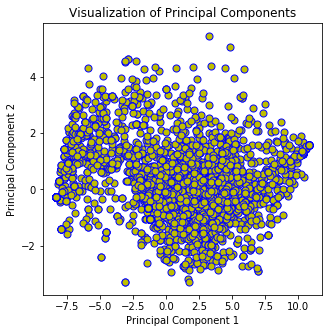

In [43]:
# plot the first two principal components -- no cluster labels/predictions yet

oa = plt.figure(figsize=(5,5))
oy = plt.xlabel('Principal Component 1')
oz = plt.ylabel('Principal Component 2')
op = plt.title('Visualization of Principal Components')
bv = plt.scatter(data_pca_20.pca_1, data_pca_20.pca_2, s = 50, marker='o', color='y', edgecolor='b')

print((1-round(pca_20.explained_variance_ratio_[0] + pca_20.explained_variance_ratio_[1],1))*100, 
      '% information loss when only consdiering first two principal components')
# so, when projecting 31 dimensions to 2 dimensions

In [44]:
# principal components for all 20 attributes

eigenvectors_df = pd.DataFrame(pca_20.components_, columns=predictors_df.columns)
eigenvectors_df = eigenvectors_df.abs()
eigenvectors_df.head(20)

,access,channels,biz_products,biz_cash_flow,cool,emerging_leader,innovative,personalized,trustworthy,biz_responsive,...,biz_financing,clear_comms,account_security,life_easier,biz_invest,app_approval_quick,fair_fees,best_rates,fair_treatment,good_value
0,0.171263,0.160705,0.174475,0.180422,0.119001,0.147442,0.168628,0.187358,0.163505,0.198311,...,0.191478,0.198958,0.172270,0.192448,0.190631,0.184753,0.185147,0.188079,0.198477,0.196264
1,0.091611,0.111571,0.070329,0.209688,0.041041,0.368638,0.221407,0.094524,0.308381,0.068642,...,0.073274,0.026835,0.081270,0.000238,0.139188,0.069250,0.096274,0.032972,0.054170,0.063096
2,0.159572,0.059479,0.021180,0.014995,0.637549,0.306665,0.186559,0.105363,0.108326,0.072212,...,0.085002,0.137785,0.075077,0.043696,0.081213,0.166085,0.094854,0.033791,0.083333,0.089507
3,0.436399,0.453869,0.056783,0.097066,0.152046,0.120950,0.109898,0.096703,0.066938,0.138227,...,0.041933,0.063606,0.405053,0.081416,0.039757,0.171918,0.166135,0.149012,0.018057,0.151842
4,0.113182,0.050803,0.276073,0.152244,0.048544,0.279620,0.252708,0.160852,0.249232,0.008995,...,0.233819,0.034610,0.062112,0.137477,0.270257,0.315664,0.028512,0.000252,0.202215,0.127928
5,0.111812,0.190728,0.222149,0.353715,0.268131,0.022851,0.074878,0.046796,0.159834,0.172435,...,0.029180,0.090118,0.156508,0.079026,0.082936,0.233283,0.255565,0.256437,0.037875,0.171036
6,0.167047,0.418394,0.054111,0.062785,0.063511,0.027810,0.268825,0.128402,0.193748,0.112668,...,0.194778,0.060647,0.048497,0.082763,0.057275,0.315088,0.378546,0.244575,0.172947,0.046753
7,0.032030,0.289857,0.447626,0.046118,0.372443,0.165216,0.197749,0.036277,0.042867,0.031881,...,0.180104,0.003791,0.176044,0.106463,0.125820,0.104118,0.147357,0.107305,0.134191,0.022017
8,0.016882,0.036665,0.080906,0.057793,0.198844,0.074599,0.108173,0.354166,0.201482,0.136969,...,0.048196,0.143509,0.088239,0.055240,0.041923,0.066329,0.375929,0.341841,0.019020,0.258892
9,0.028143,0.257076,0.026482,0.226629,0.259468,0.228409,0.200994,0.306194,0.332579,0.032012,...,0.021256,0.065321,0.334299,0.182458,0.003996,0.152316,0.038993,0.080470,0.062909,0.026805


In [45]:
# scan the eigenvectors for each of the 20 principal components, across each question
# no vector will get stretched as much as the eigenvector corresponding to the abs(maximum) eigenvalue
# eigenvectors are devoid of variance/load, so this is not as informative as examing the loadings -- included for info.
# purposes only

for i in range(20): # corresponds to the 20 principal components/rows in above table
    a = eigenvectors_df.iloc[i,:].sort_values(ascending=False)[:5] # list top 5 vectors in descending order per component
    print("component {}".format(i+1))
    print(a)
    print(" ")

component 1
valued_cust           0.200579
cust_service_excel    0.199085
clear_comms           0.198958
fair_treatment        0.198477
biz_responsive        0.198311
Name: 0, dtype: float64
 
component 2
biz_advisor        0.409578
prestigous         0.403401
emerging_leader    0.368638
cust_rewards       0.317573
trustworthy        0.308381
Name: 1, dtype: float64
 
component 3
cool               0.637549
biz_advisor        0.332082
emerging_leader    0.306665
prestigous         0.280354
best_interests     0.232714
Name: 2, dtype: float64
 
component 4
channels             0.453869
access               0.436399
account_security     0.405053
easy_app             0.233442
biz_understanding    0.221261
Name: 3, dtype: float64
 
component 5
app_approval_quick    0.315664
emerging_leader       0.279620
biz_products          0.276073
biz_invest            0.270257
easy_app              0.258594
Name: 4, dtype: float64
 
component 6
biz_cash_flow    0.353715
biz_advisor      0.302684
cool  

In [46]:
# "load" includes info. on the amount of variance; since principal components are used to explain variance of 
# variables, it makes more sense to use loadings than eigenvectors

# when multiplying the  eigenvector by sqrt(eigenvalue), we load/scale the bare coefficient by amount of variance; we
# make the coefficient to be measure of association/co-variability

loadings = pca_31.components_ * np.sqrt(pca_31.explained_variance_)

loadings_df = pd.DataFrame(loadings, columns=predictors_df.columns)
loadings_df = loadings_df.abs()
loadings_df.head(20)

,access,channels,biz_products,biz_cash_flow,cool,emerging_leader,innovative,personalized,trustworthy,biz_responsive,...,biz_financing,clear_comms,account_security,life_easier,biz_invest,app_approval_quick,fair_fees,best_rates,fair_treatment,good_value
0,0.699140,0.185281,0.183570,0.173292,0.108900,0.125816,0.131930,0.140992,0.120028,0.138966,...,0.111014,0.111252,0.094426,0.105078,0.100914,0.096237,0.095264,0.093503,0.092988,0.089831
1,0.373961,0.128632,0.074000,0.201398,0.037559,0.314577,0.173210,0.071146,0.226379,0.048098,...,0.042480,0.014989,0.044551,0.000141,0.073683,0.036083,0.049538,0.016391,0.025373,0.028884
2,0.651425,0.068575,0.022282,0.014405,0.583432,0.261690,0.145952,0.079281,0.079521,0.050601,...,0.049281,0.077055,0.041149,0.023852,0.042992,0.086519,0.048805,0.016799,0.039045,0.040965
3,1.781638,0.523283,0.059780,0.093260,0.139153,0.103265,0.085889,0.072866,0.049144,0.096883,...,0.024326,0.035681,0.221988,0.044532,0.021036,0.089625,0.085497,0.074075,0.008420,0.069533
4,0.462108,0.058572,0.290483,0.146241,0.044418,0.238637,0.197660,0.120994,0.182961,0.006314,...,0.135569,0.019414,0.034026,0.075021,0.143059,0.164389,0.014662,0.000129,0.094761,0.058535
5,0.456725,0.219890,0.233654,0.339689,0.245339,0.019385,0.058384,0.035026,0.117341,0.120788,...,0.016942,0.050168,0.085720,0.042992,0.043925,0.121371,0.131525,0.127473,0.017664,0.078353
6,0.681757,0.482387,0.056888,0.060325,0.058145,0.023801,0.210206,0.096726,0.142236,0.078924,...,0.112915,0.034031,0.026548,0.045106,0.030329,0.164202,0.194789,0.121582,0.081072,0.021437
7,0.130615,0.334174,0.470925,0.044305,0.340852,0.141038,0.154623,0.027231,0.031475,0.022322,...,0.104410,0.002205,0.096517,0.058188,0.066611,0.054185,0.075808,0.053350,0.062902,0.010107
8,0.069683,0.042159,0.084911,0.055518,0.182079,0.063334,0.085125,0.266119,0.147819,0.095868,...,0.027983,0.080674,0.048458,0.030447,0.022163,0.034302,0.193470,0.169911,0.009080,0.118639
9,0.120870,0.296502,0.029767,0.217241,0.237829,0.197046,0.160482,0.232086,0.244341,0.021608,...,0.012154,0.038993,0.182077,0.097544,0.001974,0.077609,0.019778,0.039620,0.030441,0.013127


In [47]:
# scan the loadings for each of the 31 principal components, across each question

# factor loading = the correlation coefficient for the variable & factor; it shows variance explained by the variable 
# on that particular factor

# loading matrix: vertical SS are eigenvalues/components variances; horizontal SS are portions of variables' variances 
# being explaiend by components

for i in range(31): # corresponds to the 20 principal components/rows in above table
    a = loadings_df.iloc[i,:].sort_values(ascending=False)[:5] # list top 5 loadings in descending order per component
    print("component {}".format(i+1))
    print(a)
    print(" ")

component 1
access           0.699140
channels         0.185281
biz_products     0.183570
biz_cash_flow    0.173292
personalized     0.140992
Name: 0, dtype: float64
 
component 2
access             0.373961
emerging_leader    0.314577
biz_advisor        0.281186
prestigous         0.261308
trustworthy        0.226379
Name: 1, dtype: float64
 
component 3
access             0.651425
cool               0.583432
emerging_leader    0.261690
biz_advisor        0.227966
prestigous         0.181603
Name: 2, dtype: float64
 
component 4
access               1.781638
channels             0.523283
account_security     0.221988
biz_understanding    0.150599
easy_app             0.139318
Name: 3, dtype: float64
 
component 5
access             0.462108
biz_products       0.290483
emerging_leader    0.238637
innovative         0.197660
trustworthy        0.182961
Name: 4, dtype: float64
 
component 6
access           0.456725
biz_cash_flow    0.339689
cool             0.245339
biz_products     0.2

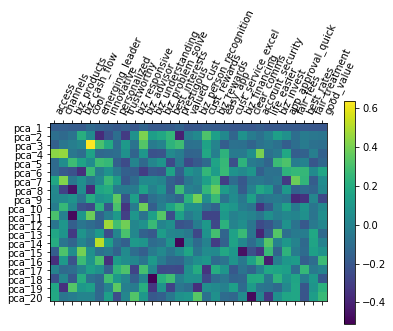

In [48]:
# use a heatmap to visualize the above loadings but just for the 20 principal compoenents that explain 90% of the
# variance

# they help interpret principal components bc they are weights/coefficients whereby unit-scaled components load a variable

tt = plt.matshow(pca_20.components_,cmap='viridis')
tu = plt.yticks(range(0,20),data_pca_20.columns,fontsize=10)
tp = plt.xticks(range(len(predictors_df.columns)),predictors_df.columns,rotation=65,ha='left')
tq = plt.colorbar()

### Principal Component Regression

#### Step 1: PCA only on training set
(yields results highly similar to PCA on full dataset, which makes logical sense since we are working with 80% of the original data)

array([ 53.67201621,  58.07140715,  61.62624196,  64.6154195 ,
        67.37261618,  69.67802889,  71.72023915,  73.49505256,
        75.201803  ,  76.79565059,  78.34365997,  79.847631  ,
        81.29154454,  82.68398459,  84.03047936,  85.36057425,
        86.62611777,  87.83061481,  89.01229823,  90.11994649,
        91.19092897,  92.25515096,  93.25782631,  94.24857589,
        95.21453652,  96.12273386,  96.97073582,  97.80831281,
        98.60657604,  99.32119713, 100.        ])

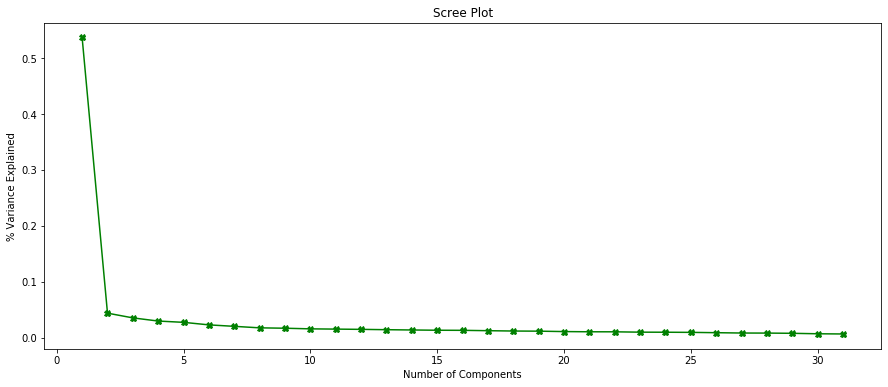

In [49]:
# PCA leads to orthogonality; orthogonal means all independent variables in the model are uncorrelated
# PCA splits covariance/correlation matrix into eigenvalues (scale) and eigenvectors (direction)

# PCA is affected by scale: need to scale features prior to applying PCA
# standardize the data to have a mean of 0 & variance of 1
X_train = StandardScaler().fit_transform(X_train) # standardize the features

# initial number of principal components to examine, matching # of cols in dataset
n_com = 31
pca_31 = PCA(n_components = n_com)
principal_components_31 = pca_31.fit_transform(X_train)

# how much information (variance) can be attributed to each principal components
explained_variance_ratio = pca_31.explained_variance_ratio_ 

# plot explained variance ratio w/ PCA Scree Plot (defined in next cell)
x_axis = range(1, n_com + 1)
aa = plt.figure(figsize=(15, 6))
bb = plt.plot(x_axis, explained_variance_ratio, marker = 'X', color='g')
cc = plt.xlabel('Number of Components')

dd = plt.ylabel('% Variance Explained')
kk = plt.title('Scree Plot')

# cumulative amount of variance explained -- nearly same results as on full dataset
(np.cumsum(pca_31.explained_variance_)/np.sum(pca_31.explained_variance_)*100)

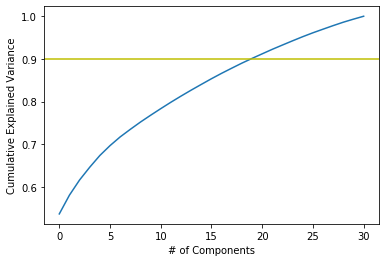

In [50]:
# still just want to focus on 20 principle components

ee = plt.plot(np.cumsum(pca_31.explained_variance_ratio_)) # cumulative % of variance explained -- most understandable
gg = plt.xlabel('# of Components')
pp = plt.ylabel('Cumulative Explained Variance')
ss = plt.axhline(y=0.9, color='y')

##### Again, 20 of the principal components explain 90% of the variance, so move forward with this subset of components

In [51]:
# scale the data prior to PCA
X_train = StandardScaler().fit_transform(X_train) 

# PCA w/ 20 components which explain ~90% of variance
n_com_2 = 20
pca_20 = PCA(n_components = n_com_2)
pca_result_20 = pca_20.fit_transform(X_train) # model learns on 20 scaled principal components

# create df
data_pca_20 = pd.DataFrame(pca_result_20)

# add cols
l = range(1, n_com_2 + 1)
cols = []

for i in l:
    cols.append('pca_' + str(i))

data_pca_20.columns = cols

# note: no particular meaning assigned to each principal component; they represent the main dimensions of variation
data_pca_20.head(3)

data_pca_20.shape
len(y_train)

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20
0,1.413372,-0.230351,-1.123511,1.228572,0.198429,-0.831380,-1.088271,-0.310938,-0.486637,0.308084,0.737759,-0.563353,0.000160,-0.413174,0.084611,0.204337,-0.314974,0.362899,0.191776,-0.332922
1,0.958034,-0.798543,0.152346,0.193246,-0.453914,-1.203677,0.080800,0.304329,1.247198,-0.000567,0.949382,-1.490073,-0.369715,0.331557,0.148411,0.272828,-0.220145,-0.727638,0.667687,0.211185
2,2.664040,0.812481,-0.288810,-2.098721,-1.112327,0.805966,0.822989,-0.657809,-1.363741,0.203474,-0.463120,0.115787,0.295906,-0.185048,0.180331,-1.252151,0.339518,-1.253873,0.575120,-0.547823


(3069, 20)

3069

#### Step 2: Actual Principal Component Regression
(apply learnings from train on test set)
 - scale predictors but not target variable to avoid situation when one or several features dominate others in magnitude
 - do not scale target b/c mean squared error is then automatically scaled
 - MSE > 1 automatically means that you are doing worse than a naive prediction

7.7575
7.5696
7.5771
7.5215
7.4096
7.4048
7.3784
7.3442
7.3454
7.3346
7.3416
7.3455
7.3506
7.3531
7.3605
7.371
7.375
7.3721
7.3814


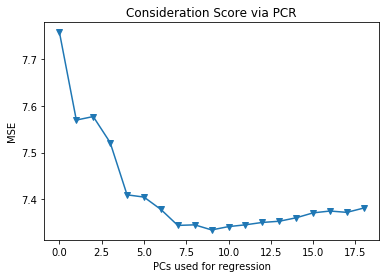

In [65]:
# define new X training set as per the PCA, scaling, fitting and transforming done above
X_train_new = pca_result_20
n = len(X_train_new)

# 5-fold cross validation
kf_5 = model_selection.KFold(n_splits=5, shuffle=True, random_state=1)

# instantiate regression object
regr = LinearRegression()

# instantiate list to tract MSE as various principal components utilized during regression
MSE = []

# calculate MSE using cross validation for the 20 principal components in a stepwise fashion (adding 1 at a time)
for i in np.arange(1, 20):
    
    score = -1*model_selection.cross_val_score(regr, X_train_new[:,:i], y_train.ravel(), cv=kf_5, 
                                               scoring='neg_mean_squared_error').mean()
    MSE.append(score)

# plot
bb = plt.plot(np.array(MSE), '-v')
bc = plt.xlabel('PCs used for regression')
bd = plt.ylabel('MSE')
qq = plt.title('Consideration Score via PCR')

# lowest CV score occurs when 11 principal components are used
for item in MSE:
    print(round(item,4))

In [53]:
# scale the data prior to applying PCA learned from train
X_test = StandardScaler().fit_transform(X_test) 

X_test_new = pca_20.fit_transform(X_test)[:,:12]

In [55]:
# apply to test set

# train regressor on PCA from train but just use first 11 principal components based on insight from in-sample MSE
regr = LinearRegression()
regr.fit(X_train_new[:,:12], y_train)

# predict on test set
predictions = regr.predict(X_test_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
# evaluate prediction -- results are no better than a naive prediction
MSE = mean_squared_error(y_test.ravel(), predictions)
print(MSE)

print(' ')
print('R-squared: %.2f'% r2_score(scale(y_test.ravel()), predictions)) # this is terrible

print(' ')
print('Regression Coefficients: \n', regr.coef_)

8.059148566119301
 
R-squared: -63.75
 
Regression Coefficients: 
 [ 0.02108321 -0.37462617  0.02479148 -0.24523575 -0.3654491  -0.11075196
 -0.21263462 -0.26591683  0.05551125  0.20757623  0.04031165 -0.1413418 ]


### Random Forest Regression
 - PCA can improve Random Forest b/c you reduce the dimensionality of the dataset and b/c you get rid of collinear features (collinear features will wind up in a PCA component)
 - Regression trees are appropriate here b/c we are dealing with ordered whole values

#### First: on first 20 principal components

In [57]:
# use all of X_test_new data; so, all 20 principal components

X_test_new = pca_20.fit_transform(X_test) # leverages learnings from PCA on train, applying to test set

In [58]:
rf = RandomForestRegressor(random_state = 2020)

rf.fit(X_train_new,y_train)
preds = rf.predict(X_test_new)

print(' ')
r_squared = metrics.r2_score(y_test, preds)
print('The R-squared for Random Forest Model is {0:.2f}'.format(r_squared * 100))

print(' ')
adj_r_squared = 1 - (1-r_squared)*(len(y_test) - 1)/(len(y_test)-X_test_new.shape[1]-1)
print('The Adjsuted R-squared for Random Forest Model is {0:.2f}'.format(adj_r_squared*100))

print(' ')
MSE = mean_squared_error(y_test, preds)
print('The Mean Squared Error for Random Forest Model is {0:.2f}'.format(MSE))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=2020, verbose=0, warm_start=False)

 
The R-squared for Random Forest Model is 3.32
 
The Adjsuted R-squared for Random Forest Model is 0.73
 
The Mean Squared Error for Random Forest Model is 7.95


#### Second: on all original data to determine variable importance

In [59]:
X = modeling_df.iloc[:, 0:31]

rf = RandomForestRegressor(random_state = 2021, max_features = 0.2, n_estimators = 500, n_jobs = -1, 
                           oob_score = True) # oob is for cross validation

rf.fit(X,y)
preds = rf.predict(X)

print(' ')
r_squared = metrics.r2_score(y, preds)
print('The R-squared for Random Forest Model is {0:.2f}'.format(r_squared * 100))

print(' ')
adj_r_squared = 1 - (1-r_squared)*(len(y) - 1)/(len(y)-X.shape[1]-1)
print('The Adjsuted R-squared for Random Forest Model is {0:.2f}'.format(adj_r_squared*100))

print(' ')
MSE = mean_squared_error(y, preds)
print('The Mean Squared Error for Random Forest Model is {0:.2f}'.format(MSE))

feature_importance = pd.DataFrame(rf.feature_importances_, index = X.columns, 
                                  columns=['importance']).sort_values('importance', ascending=False)

print(' ')
print('Random Forest Feature Importances')
feature_importance.head(20) # top 20 features by importance

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=True,
                      random_state=2021, verbose=0, warm_start=False)

 
The R-squared for Random Forest Model is 66.67
 
The Adjsuted R-squared for Random Forest Model is 66.40
 
The Mean Squared Error for Random Forest Model is 2.62
 
Random Forest Feature Importances


,importance
clear_comms,0.057745
biz_advisor,0.052577
access,0.047829
fair_treatment,0.043136
biz_products,0.037406
good_value,0.036814
easy_app,0.035542
trustworthy,0.035165
cust_rewards,0.033932
life_easier,0.033550


#### Third: on top features in terms of above feature importance, removing highly collinear features
(this results in 16 features selected via the below mask)

In [60]:
# as per above correlation matrix, certain features are colinear and can be removed

# valued_cust is highly corrleated with biz_person_recognition and cust_service_excel
# easy_app is highly correlated with app_approval_quick

# therefore, drop biz_person_recongition, cust_service_excel and app_approval_quick at least but also see marginal 
# value of including each additional variable

# the highly correlated variables can essentially be viewed as subsitutes

In [61]:
X = modeling_df.iloc[:, 0:31]

# there is only marginal value of including variables above and beyond these
mask = ['clear_comms', 'biz_advisor', 'access', 'fair_treatment', 'biz_products', 'good_value', 'easy_app',
       'trustworthy', 'cust_rewards', 'life_easier', 'best_interests', 'cool', 'prestigous',
       'emerging_leader', 'valued_cust', 'fair_fees']
# so, we are able to eliminate ~ 50% of features, greatly simplifiying model, while still keeping enough features
# to maintain the predictive power of the model

X = X[mask]

rf = RandomForestRegressor(random_state = 2021, max_features = 0.2, n_estimators = 100, n_jobs = -1, 
                           oob_score = True)

rf.fit(X,y)
preds = rf.predict(X)

print(' ')
r_squared = metrics.r2_score(y, preds)
print('The R-squared for Random Forest Model is {0:.2f}'.format(r_squared * 100))

print(' ')
adj_r_squared = 1 - (1-r_squared)*(len(y) - 1)/(len(y)-X.shape[1]-1)
print('The Adjsuted R-squared for Random Forest Model is {0:.2f}'.format(adj_r_squared*100))

print(' ')
MSE = mean_squared_error(y, preds)
print('The Mean Squared Error for Random Forest Model is {0:.2f}'.format(MSE))

feature_importance = pd.DataFrame(rf.feature_importances_, index = X.columns, 
                                  columns=['importance']).sort_values('importance', ascending=False)

print(' ')
print('Random Forest Feature Importances')
feature_importance.head(16) # top 10 features by importance

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=True,
                      random_state=2021, verbose=0, warm_start=False)

 
The R-squared for Random Forest Model is 64.09
 
The Adjsuted R-squared for Random Forest Model is 63.94
 
The Mean Squared Error for Random Forest Model is 2.82
 
Random Forest Feature Importances


,importance
clear_comms,0.082193
biz_advisor,0.075379
access,0.073541
good_value,0.067757
biz_products,0.064587
cust_rewards,0.063296
fair_treatment,0.062065
cool,0.061410
easy_app,0.059857
emerging_leader,0.059292


In [62]:
X = modeling_df.iloc[:, 0:31]

# using variables from above
mask = ['clear_comms', 'biz_advisor', 'access', 'fair_treatment', 'biz_products', 'good_value', 'easy_app',
       'trustworthy', 'cust_rewards', 'life_easier', 'best_interests', 'cool', 'prestigous',
       'emerging_leader', 'valued_cust', 'fair_fees']


X = X[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape
y_train.shape

X_test.shape
y_test.shape

(3069, 16)

(3069,)

(768, 16)

(768,)

In [63]:
rf = RandomForestRegressor(random_state = 2021, max_features = 0.2, n_estimators = 100, n_jobs = -1, 
                           oob_score = True) # cross validation was used to handle imbalanced data

rf.fit(X_train,y_train)
preds = rf.predict(X_test)

print(' ')
r_squared = metrics.r2_score(y_test, preds)
print('The R-squared for Random Forest Model is {0:.2f}'.format(r_squared * 100))

print(' ')
adj_r_squared = 1 - (1-r_squared)*(len(y_test) - 1)/(len(y_test)-X_test.shape[1]-1)
print('The Adjsuted R-squared for Random Forest Model is {0:.2f}'.format(adj_r_squared*100))

print(' ')
MSE = mean_squared_error(y_test, preds)
print('The Mean Squared Error for Random Forest Model is {0:.2f}'.format(MSE))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=True,
                      random_state=2021, verbose=0, warm_start=False)

 
The R-squared for Random Forest Model is 35.53
 
The Adjsuted R-squared for Random Forest Model is 34.16
 
The Mean Squared Error for Random Forest Model is 5.30
